<a href="https://colab.research.google.com/github/sanikak1910/Machine_Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA (Principle Component Analysis)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('/content/Wine.csv')

In [4]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [10]:
X_train

array([[1.369e+01, 3.260e+00, 2.540e+00, ..., 9.600e-01, 1.820e+00,
        6.800e+02],
       [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.162e+01, 1.990e+00, 2.280e+00, ..., 1.160e+00, 2.960e+00,
        3.450e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

In [12]:
X_test.shape

(36, 13)

Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [15]:
X_test

array([[ 9.38847070e-01, -6.32166068e-01, -4.35010303e-01,
        -9.19695615e-01,  1.26324041e+00,  5.59998633e-01,
         9.77754158e-01, -1.20637533e+00,  2.36680192e-02,
         3.39284695e-01, -1.45574805e-01,  8.52295413e-01,
         1.04940526e+00],
       [-2.42263344e-01,  2.67579163e-01,  4.20859365e-01,
         7.12764102e-01,  8.40672358e-01, -1.27747161e+00,
        -6.05828120e-01, -9.70634096e-01, -5.87397203e-01,
         2.42611713e+00, -2.06608025e+00, -1.55017035e+00,
        -8.66598582e-01],
       [-7.64438475e-01, -1.11802849e+00, -7.69915825e-01,
        -1.61767889e-01, -9.20027861e-01,  2.03653722e+00,
         1.18341419e+00, -1.36353615e+00,  4.48018868e-01,
        -2.50930538e-01,  1.16386073e+00,  3.94021597e-01,
        -1.06480588e+00],
       [ 7.15057728e-01, -5.78181354e-01,  3.46435916e-01,
         2.75498106e-01,  1.12238439e+00,  1.15061407e+00,
         8.54358136e-01, -1.28495574e+00,  1.43251284e+00,
         5.07917619e-01,  1.16312302e

In [16]:
y_train

array([3, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3,
       2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 2, 2,
       2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2,
       2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 3, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 3])

In [17]:
y_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

Applying PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [19]:
X_train # reduced dimensions

array([[-2.17884511e+00,  1.07218467e+00],
       [-1.80819239e+00, -1.57822344e+00],
       [ 1.09829474e+00, -2.22124345e+00],
       [-2.55584748e+00,  1.66210369e+00],
       [ 1.85698063e+00, -2.41573166e-01],
       [ 2.58288576e+00,  1.37668170e+00],
       [ 8.72876119e-01, -2.25618512e+00],
       [-4.18384029e-01, -2.35415681e+00],
       [-3.04977245e-01, -2.27659433e+00],
       [ 2.14082532e+00,  1.10052871e+00],
       [-2.98136465e+00,  2.47159183e-01],
       [ 1.96188242e+00, -1.25407738e+00],
       [-2.16177795e+00,  9.75966550e-01],
       [ 2.21976084e+00,  2.39507167e+00],
       [-2.30179529e+00,  2.05791962e-01],
       [-3.00953827e+00,  2.79141212e-01],
       [ 2.63443473e+00,  8.68313119e-01],
       [-1.09219965e+00,  3.53906625e+00],
       [ 2.62578435e+00,  2.96852840e-03],
       [ 1.98077342e-01, -2.29193443e+00],
       [-2.67442753e+00,  2.58800132e+00],
       [-2.54763698e+00,  4.52703891e-01],
       [ 1.77416736e+00, -8.43586940e-01],
       [-2.

In [20]:
X_test

array([[ 2.20685211e+00,  1.02850086e+00],
       [-2.53651962e+00,  1.83644227e+00],
       [ 2.19183305e+00, -1.81240519e+00],
       [ 2.51489251e+00,  1.38907803e+00],
       [-3.47991313e-01, -5.25397912e-01],
       [ 1.44174066e+00,  2.89674514e-01],
       [ 2.11892046e+00,  1.62960181e+00],
       [-3.06045961e+00,  6.70950629e-01],
       [-2.35436876e-01, -2.16810201e+00],
       [-1.21230749e+00, -2.12204944e+00],
       [-2.20706720e+00,  2.61457262e-01],
       [-4.19759580e+00,  5.36505538e-01],
       [ 3.11063501e+00,  2.26380692e+00],
       [ 2.39878282e+00, -1.29482006e+00],
       [-2.16102953e+00,  1.95327620e+00],
       [ 9.26627235e-01, -3.35678339e+00],
       [ 1.96950425e+00,  1.65130081e+00],
       [ 3.61413167e+00,  2.68087967e+00],
       [-1.71986182e+00, -9.29936963e-01],
       [ 2.93212799e+00,  8.79320756e-01],
       [ 2.36911995e+00, -1.73171845e+00],
       [ 1.23368522e+00,  1.56525793e-01],
       [ 1.07525557e+00,  8.97240861e-01],
       [ 5.

Training the Logistic Regression Model

In [21]:
# training naive bayes model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]]


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

In [26]:
# Classification Report having F1-score, accuracy, precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/tmp/ipython-input-27-3318974776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


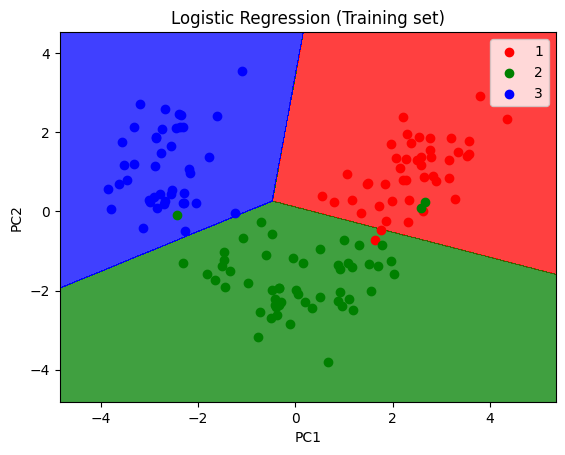

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()